In [ ]:
import numpy as np
import pandas as pd

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('G2_summaries.csv')
df

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Restaurant,Article Title,Article Link,Summary
0,Sweetgreen,sweetgreen: Nicolas Jammet\n& Jonathan Neman,https://www.npr.org/2020/04/10/831678631/sweet...,sweetgreen is using new technology to re-imagi...
1,Sweetgreen,How sweetgreen plans to cut its carbon footpri...,https://www.fastcompany.com/90606733/how-sweet...,fast-food chain sweetgreen has a lower carbon ...
2,Sweetgreen,sweetgreen now offers 5 months of parental leave,https://www.cbsnews.com/news/sweetgreen-announ...,healthy food chain sweetgreen is now offering ...
3,Sweetgreen,Purpose at work: how sweetgreen is building a ...,https://www.forbes.com/sites/simonmainwaring/2...,sweetgreen is a powerful example of a brand ma...
4,Roti,"If There’s One Industry That Can Beat COVID, I...",https://www.qsrmagazine.com/outside-insights/i...,a year ago the world as we knew it came to a s...
5,Roti,Rōti Reopens Reimagined Northbrook Flagship,https://www.qsrmagazine.com/news/roti-reopens-...,rti northbrook a fast-casual mediterranean res...
6,Roti,Rōti Modern Mediterranean Names Justin Seamon...,https://www.qsrmagazine.com/news/ro-ti-modern-...,rti modern mediterranean announced the appoint...
7,Roti,Roti to Open First Texas Location Friday,https://www.qsrmagazine.com/news/roti-open-fir...,roti modern mediterranean will open its first ...
8,Roti,Rōti Modern Mediterranean to Deploy Eatsa Tech...,https://www.qsrmagazine.com/news/r-ti-modern-m...,the first rti restaurant to showcase the full ...
9,Roti,Rōti Modern Mediterranean Receives $23M Invest...,https://www.qsrmagazine.com/news/r-ti-modern-m...,rti modern mediterranean has announced a $23 m...


In [ ]:
#deleting company names
summaries = df['Summary']
companies = ['sweetgreen', 'rti modern mediterranean', 'roti modern mediterranean', 'rti', 'roti', 'noodles company', 'noodles', 'au bon pain']
cleaned_summaries = []
for summary in summaries:
    for company in companies:
        if company in summary:
            summary = summary.replace(company, '').strip()
    cleaned_summaries.append(summary)
cleaned_summaries

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['is using new technology to re-imagine the fast-casual model the restaurant is using new technology to re-imagine the fast-casual model it faces unprecedented challenges from the coronavirus crisis',
 'fast-food chain  has a lower carbon footprint than a typical fast-food chain the salad chain plans to cut its carbon footprint in half in six years the rest of its emissions will be offset making the company carbon neutral',
 'healthy food chain  is now offering employees five months of paid parental leave the benefit extends to "mothers fathers adoptive parents foster parents and others with new additions to their families" the company believes "it is our responsibility to lead the way given the us is one of the few countries that does not mandate any paid leave for new parents"',
 'is a powerful example of a brand marrying purpose with profit to scale growth and impact the fast casual food chain has demonstrated impressive growth showcasing over 100 locations across the us',
 'a year 

In [ ]:
#vectorize summaries
vectorizer = CountVectorizer(analyzer='word', min_df=3, stop_words='english', lowercase=True, token_pattern='[a-zA-Z0-9]{3,}', max_features=5000)
data_vectorized = vectorizer.fit_transform(cleaned_summaries)

#generate 6 topics
lda_model = LatentDirichletAllocation(n_components=6, learning_method='online', random_state=0, n_jobs = -1)
lda_output = lda_model.fit_transform(data_vectorized)

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer, mds='tsne')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TS

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1       1.465019 -47.625065       1        1  38.898586
3      54.854797 -36.476795       2        1  28.255299
0      32.212929 -61.444572       3        1  12.067378
5       5.111096 -14.110332       4        1  10.966917
4      26.350170 -33.374702       5        1   5.758586
2      38.109818  -7.222781       6        1   4.053233, topic_info=          Term       Freq      Total Category  logprob  loglift
58  restaurant   7.000000   7.000000  Default  30.0000  30.0000
13       chain   4.000000   4.000000  Default  29.0000  29.0000
23        fast  11.000000  11.000000  Default  28.0000  28.0000
1         2022   5.000000   5.000000  Default  27.0000  27.0000
29        food   4.000000   4.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
11      casual   0.193867  10.479548   Topic6  -4.4823  -0.7844
10         caf   0.172303   5.907222   Topic6  -4.6002  -0.3290
50         new   0.196915  29.475764   Topic6  -4.4667  -1.8029
44        like   0.167519   6.824737   Topic6  -4.6284  -0.5016
23        fast   0.172492  11.410196   Topic6  -4.5991  -0.9863

[256 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
0         3  0.581479       2021
1         3  0.673492       2022
2         2  0.252130  announced
2         3  0.252130  announced
2         6  0.252130  announced
...     ...       ...        ...
72        4  0.251183  wednesday
73        1  0.532883     winter
73        3  0.266441     winter
74        2  0.290329       year
74        3  0.580659       year

[161 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 6, 5, 3])

In [ ]:
def show_topics(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

#top 20 words in each topic
topic_keywords = show_topics(vectorizer, lda_model, 20)

#turn into table
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+ str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+ str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,2022,conference,company,results,2021,quarter,financial,wednesday,international,year,announced,growth,chicken,free,uses,technology,winter,restaurant,brand,business
Topic 1,new,menu,chicken,sandwich,salad,like,items,time,limited,available,blueberry,cookies,breakfast,internationally,protein,guests,leader,favorites,offerings,category
Topic 2,business,restaurant,food,brand,leader,experience,growth,announced,locations,wednesday,2022,bread,company,bakery,seasonal,new,recipes,casual,chain,delicious
Topic 3,new,pumpkin,casual,fast,seasonal,menu,popular,savory,restaurant,flavor,caf,bakery,fall,latte,locations,available,technology,features,limited,innovative
Topic 4,chain,food,fast,growth,company,salad,locations,casual,brand,new,mediterranean,include,location,restaurant,ingredients,menu,results,2021,breakfast,sandwich
Topic 5,coffee,free,day,salads,caf,time,like,summer,favorite,salad,location,sandwiches,fall,guests,ingredients,restaurant,uses,recipes,select,chain


In [ ]:
def topic_wordcloud(index):
    topic = ""
    topic_lst = df_topic_keywords.iloc[index].to_list()
    for w in topic_lst:
        topic = topic + w + " "
    topic = topic.strip()
    wordcloud = WordCloud(background_color='white', stopwords=set(STOPWORDS), max_words=500, max_font_size=40, random_state=42).generate(topic)

    fig = plt.figure(1)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be

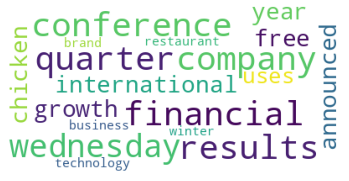

/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python

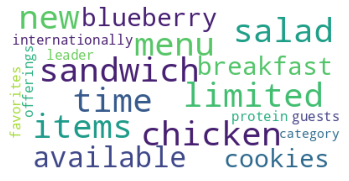

/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is No

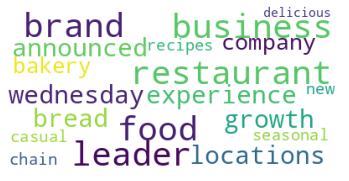

/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is No

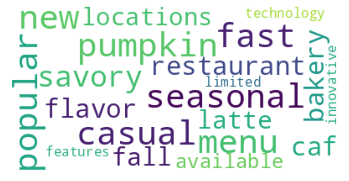

/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


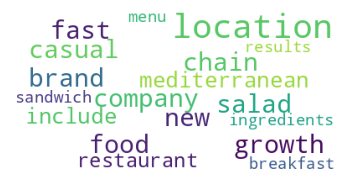

/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:492: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:513: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/root/venv/lib/python3.7/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else


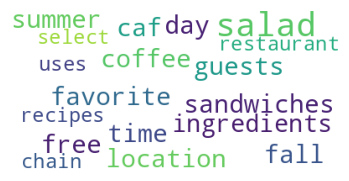

In [ ]:
#generate wordclouds for each of 6 topics
for i in range(6):
    topic_wordcloud(i)

In [ ]:
#assign topic theme to each topic
topics_theme = ["Financial/Technological/Reach Conferences/Results", "Innovation in Existing/Core Menu Items", "Announcements of Success (e.g. Leadership/Growth)", "Seasonal/Limited Menu Items", "Location Expansion", "Customer Care"]
df_topic_keywords['topic_theme'] = topics_theme
df_topic_keywords.set_index('topic_theme', inplace=True)
df_topic_keywords.T

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


topic_theme,Financial/Technological/Reach Conferences/Results,Innovation in Existing/Core Menu Items,Announcements of Success (e.g. Leadership/Growth),Seasonal/Limited Menu Items,Location Expansion,Customer Care
Word 0,2022,new,business,new,chain,coffee
Word 1,conference,menu,restaurant,pumpkin,food,free
Word 2,company,chicken,food,casual,fast,day
Word 3,results,sandwich,brand,fast,growth,salads
Word 4,2021,salad,leader,seasonal,company,caf
Word 5,quarter,like,experience,menu,salad,time
Word 6,financial,items,growth,popular,locations,like
Word 7,wednesday,time,announced,savory,casual,summer
Word 8,international,limited,locations,restaurant,brand,favorite
Word 9,year,available,wednesday,flavor,new,salad


In [ ]:
#find dominant topic for each summary
topicnames = df_topic_keywords.T.columns
docnames = ["Doc" + str(i) for i in range(len(df))]
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topic.reset_index(inplace=True)
df_sent_topic= pd.merge(df, df_document_topic, left_index=True, right_index=True)
df_sent_topic.drop('index', axis=1, inplace=True)

#new table with summary, dominant topic, and dominant topic theme
df_topic_theme = df_sent_topic[['Summary', 'dominant_topic']]

def label_theme(row):
    if row['dominant_topic'] == 0:
        return "Financial/Technological/Reach Conferences/Results"
    if row['dominant_topic'] == 1:
        return "Innovation in Existing/Core Menu Items"
    if row['dominant_topic'] == 2:
        return "Announcements of Success (e.g. Leadership/Growth)"
    if row['dominant_topic'] == 3:
        return "Seasonal/Limited Menu Items"
    if row['dominant_topic']  == 4:
        return "Location Expansion"
    if row['dominant_topic'] == 5:
        return "Customer Care"
      
df_topic_theme['dominant_topic_theme'] = df_topic_theme.apply (lambda row: label_theme(row), axis=1)
df_topic_theme

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Summary,dominant_topic,dominant_topic_theme
0,sweetgreen is using new technology to re-imagi...,3,Seasonal/Limited Menu Items
1,fast-food chain sweetgreen has a lower carbon ...,4,Location Expansion
2,healthy food chain sweetgreen is now offering ...,4,Location Expansion
3,sweetgreen is a powerful example of a brand ma...,4,Location Expansion
4,a year ago the world as we knew it came to a s...,0,Financial/Technological/Reach Conferences/Results
5,rti northbrook a fast-casual mediterranean res...,3,Seasonal/Limited Menu Items
6,rti modern mediterranean announced the appoint...,2,Announcements of Success (e.g. Leadership/Growth)
7,roti modern mediterranean will open its first ...,1,Innovation in Existing/Core Menu Items
8,the first rti restaurant to showcase the full ...,3,Seasonal/Limited Menu Items
9,rti modern mediterranean has announced a $23 m...,0,Financial/Technological/Reach Conferences/Results


In [ ]:
#count # of summaries in each topic
count = df_topic_theme.groupby('dominant_topic').size().to_list()
count_df = pd.DataFrame(list(zip(topics_theme, count)), columns=['Topic', 'Count'])
count_df


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Topic,Count
0,Financial/Technological/Reach Conferences/Results,8
1,Innovation in Existing/Core Menu Items,13
2,Announcements of Success (e.g. Leadership/Growth),3
3,Seasonal/Limited Menu Items,12
4,Location Expansion,3
5,Customer Care,6


In [ ]:
#pie chart for all summaries
import plotly.express as px
fig = px.pie(count_df, values='Count', names='Topic', color='Topic', 
    color_discrete_map={'Financial/Technological/Reach Conferences/Results':'cornflowerblue',
    'Innovation in Existing/Core Menu Items':'mediumorchid',
    'Announcements of Success (e.g. Leadership/Growth)':'limegreen',
    'Seasonal/Limited Menu Items':'coral',
    'Location Expansion': 'pink',
    'Customer Care':'mediumturquoise'})
fig.show()

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#pie charts for each company
def co_count_df(start, end):
    topic = df_topic_theme.iloc[start:end]
    count = topic.groupby('dominant_topic').size().to_list()
    count_df = pd.DataFrame(list(zip(topics_theme, count)), columns=['Topic', 'Count'])
    return count_df

def co_pie(df):
    fig = px.pie(df, values='Count', names='Topic', color='Topic', 
    color_discrete_map={'Financial/Technological/Reach Conferences/Results':'cornflowerblue',
    'Innovation in Existing/Core Menu Items':'mediumorchid',
    'Announcements of Success (e.g. Leadership/Growth)':'limegreen',
    'Seasonal/Limited Menu Items':'coral',
    'Location Expansion': 'pink',
    'Customer Care':'mediumturquoise'})
    fig.show()

#sweetgreen
sg_topic = co_count_df(0,4)
#roti
rt_topic = co_count_df(4,15)
#noodles & co
n_topic = co_count_df(15,25)
#au bon pain
abp_topic = co_count_df(25,45)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
co_pie(sg_topic)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
co_pie(rt_topic)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
co_pie(n_topic)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
co_pie(abp_topic)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
"""
Future Steps:
- Increase dataset (web-scrape more press articles, other forms of media ex. blogs, social media posts, tweets)
    - Find more uniform way of scraping articles (ex. crunchbase - but this has privacy restrictions)
- Have professionals create/assign topic themes
- Simplify code
- Stream data?
"""

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9e88faaf-ade4-4526-a9d5-3a022b266140' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>